In [1]:
import numpy as np
import pandas as pd
import re
import glob #this makes a list of all the files in a directory
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import *

In [2]:
with_gender = pd.read_pickle("WithGenderFinal.p")
with_gender['gender'].value_counts()
line_column=[]
for i in with_gender.index:
        line_column.append(' '.join(with_gender['Speech'][i]))
with_gender['Line']=line_column

with_gender['linelength']=with_gender['Line'].str.len()
with_gender_dum = pd.get_dummies(with_gender['gender'])
with_gender = pd.concat([with_gender, with_gender_dum],axis=1).drop(['F','gender'],1)

In [3]:
with_gender['M'].value_counts()

1    201934
0     84804
Name: M, dtype: int64

In [4]:
with_gender_shuffle = shuffle(with_gender, random_state = 5)


# Randomly split into training and dev with scikit-learn helper function
train, test = train_test_split(with_gender_shuffle, test_size=0.2, random_state=100)
dev, test = train_test_split(test, test_size=0.5, random_state=200)

print train.shape
print dev.shape
print test.shape

(229390, 9)
(28674, 9)
(28674, 9)


In [5]:
train_y, dev_y, test_y = train.M, dev.M, test.M
train_X = train.drop(['M','Speech','LineID','pkey','linelength'],1)
dev_X = dev.drop(['M','Speech','LineID','pkey','linelength'],1)
test_X = test.drop(['M','Speech','LineID','pkey','linelength'],1)
dev_X.head()

,Char,Title,Genre,Line
151043,GARY,antitrust,Crime,The purpose of this company isn't to destroy o...
62727,NADIA,birthdaygirl,Crime,I know you just want to punish me --
203327,MARTY,marty,Romance,I like you. I like you. I been telling you all...
39225,JENNIFER,scream3,Mystery,"Sidney, what happened?"
102806,BLOOM,producerthe,Comedy,I never should have listened to you.


In [96]:
test_X[400:500]['Line']

24724     We all know the traditional model of a terrori...
260205                           (beat) Who's your brother?
209583                                                Yeah.
106016                                        Ashley, wait!
46228                             You can't be late though.
156678           No, sir. Pediatric convention in Delaware.
33287                              Stage IV thyroid cancer.
239395    (On phone) Damn it! That simply won't-- Richar...
200956    You see, that picture is worth any number of s...
121333    (getting a little excitable) I mean it. The ca...
94220                                            Certainly.
119184               Come on, honey, let's get out of here.
229489                                     Congratulations.
128465                                 Feel like traveling?
22660                       Don't fucking yell at me, Paul.
143621    I remember everything until we crashed. I know...
262295    I don't want to say I told you

In [7]:
labels= train_y.values.reshape(-1,1)
labels_dev=dev_y.values.reshape(-1,1)
labels_test = test_y.values.reshape(-1,1)
print('labels shape:', labels.shape)
print('labels_test shape:', labels_test.shape)
print('labels_dev shape:', labels_dev.shape)

('labels shape:', (229390, 1))
('labels_test shape:', (28674, 1))
('labels_dev shape:', (28674, 1))


In [43]:
labels_test[400:500]

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [11]:
pwd

u'/home/icwang/projects/w266_final_project'

In [16]:
ching = pd.read_csv('ching_manual_pred.csv', header=None)
michelle = pd.read_csv('michelle_manual_pred.csv', header=None)
nikki = pd.read_csv('manual_pred_nikki.csv', header=None)

In [126]:
predictions

,true,ching,michelle,nikki
0,1,1,1,1
1,1,0,1,1
2,1,1,1,1
3,1,1,0,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,0,0,0
9,1,1,0,0


In [124]:
predictions = pd.DataFrame(columns = ['true','ching', 'michelle', 'nikki'])
#predictions['true'] = labels_test[400:500]
predictions['true'] = data=labels_test[400:500].tolist()
predictions['ching'] = ching[1]
predictions['michelle'] = michelle[0]
predictions['nikki'] = nikki[0]

In [125]:
for i in range(len(predictions)):
    if predictions['true'][i] == '[0]':
        predictions['true'][i] = 0
    else:
        predictions['true'][i] = 1

for i in range(len(predictions)):
    if predictions['ching'][i] == 'M':
        predictions['ching'][i] = 1
    else:
        predictions['ching'][i] = 0
        
for i in range(len(predictions)):
    if predictions['michelle'][i] == 'M':
        predictions['michelle'][i] = 1
    else:
        predictions['michelle'][i] = 0
        
for i in range(len(predictions)):
    if predictions['nikki'][i] == 'M':
        predictions['nikki'][i] = 1
    else:
        predictions['nikki'][i] = 0        

In [123]:
ching_correct = 0
michelle_correct = 0
nikki_correct = 0
for i in range(len(predictions)):
    if str(predictions['ching'][i]) == str(predictions['true'][i]):
        ching_correct += 1
    if str(predictions['michelle'][i]) == str(predictions['true'][i]):
        michelle_correct += 1    
    if str(predictions['nikki'][i]) == str(predictions['true'][i]):
        nikki_correct += 1 

print ching_correct, michelle_correct, nikki_correct


84 69 65


In [127]:
accuracies = {}
for i in range(len(predictions)):
    accuracies[i] = 0
    if str(predictions['ching'][i]) == str(predictions['true'][i]):
        accuracies[i] += 1
    if str(predictions['michelle'][i]) == str(predictions['true'][i]):
        accuracies[i] += 1 
    if str(predictions['nikki'][i]) == str(predictions['true'][i]):
        accuracies[i] += 1 
        
accuracies

{0: 3,
 1: 2,
 2: 3,
 3: 2,
 4: 3,
 5: 3,
 6: 3,
 7: 3,
 8: 0,
 9: 1,
 10: 3,
 11: 0,
 12: 3,
 13: 2,
 14: 1,
 15: 2,
 16: 1,
 17: 0,
 18: 3,
 19: 3,
 20: 2,
 21: 2,
 22: 3,
 23: 2,
 24: 2,
 25: 1,
 26: 3,
 27: 2,
 28: 1,
 29: 2,
 30: 3,
 31: 3,
 32: 3,
 33: 1,
 34: 1,
 35: 2,
 36: 2,
 37: 3,
 38: 2,
 39: 1,
 40: 3,
 41: 2,
 42: 3,
 43: 3,
 44: 2,
 45: 3,
 46: 2,
 47: 2,
 48: 1,
 49: 3,
 50: 1,
 51: 3,
 52: 3,
 53: 1,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 3,
 60: 3,
 61: 2,
 62: 3,
 63: 2,
 64: 2,
 65: 3,
 66: 2,
 67: 2,
 68: 3,
 69: 2,
 70: 2,
 71: 0,
 72: 1,
 73: 3,
 74: 3,
 75: 3,
 76: 1,
 77: 2,
 78: 3,
 79: 3,
 80: 3,
 81: 2,
 82: 3,
 83: 1,
 84: 3,
 85: 3,
 86: 3,
 87: 1,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 1,
 93: 3,
 94: 3,
 95: 1,
 96: 3,
 97: 3,
 98: 3,
 99: 2}

In [132]:
#test_X[400:500]['Line']
incorrect = []

for i in accuracies:
    if str(accuracies[i]) == str(0):
        index = 400 + int(i)
        #print index
        #print "both guessed incorrectly"
        print test_X[index:index+1]['Line']
        print "this is a %s line" % predictions['true'][i]
        #incorrect.append(test_X[index:index+1]['Line'])
        
#print incorrect

200956    You see, that picture is worth any number of s...
Name: Line, dtype: object
this is a 1 line
119184    Come on, honey, let's get out of here.
Name: Line, dtype: object
this is a 1 line
75233    You can be in a room with 100 men, and not lik...
Name: Line, dtype: object
this is a 1 line
38942    I'm so sorry, Mark.
Name: Line, dtype: object
this is a 1 line


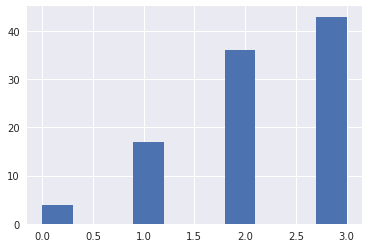

In [138]:
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline
plt.hist(accuracies.values())
plt.show()

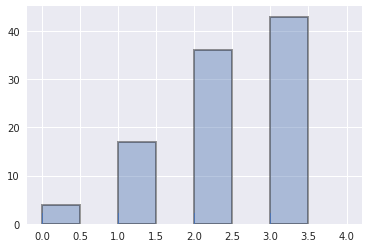

In [160]:
sns.distplot(accuracies.values(), kde=False, bins=4, rug=True, hist_kws=dict(range=(0,4), edgecolor="k", linewidth=2, width=.5))
sns.despine()